### Testing the effect of the variables on the developed model 

We will tune the values of an input and see for the effect noticed in the outputs of the model

In [1]:
#All import go here
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)

### Prepare the data for testing purposes 

In [3]:
#Get and describe
path = 'temp.csv'
df = pd.read_csv(path)
df1 = df.drop(['Sexual Orientation','D1','J1','Medical Issue','Nationality','Gender','Marital Status','Intrptr Reqd','L1','Immigration Status'],1)


In [4]:
df1.columns

Index(['Acc Type prev', 'B1', 'C1', 'TotalDisabilty', 'TotalMentalHealth',
       'Religion', 'Economic Status', 'EET status', 'Time per Session',
       'Service Type', 'Area', 'Scheme', 'Result', 'Session per week'],
      dtype='object')

## Loading the Model

In [5]:
########################################
####### Loading the model file #########
########################################

import pickle 
# optimal Thresh is 0.44
output = open('model_final.pkl','rb')
best_model = pickle.load(output)
output.close()

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pickle

######################################################################
################# Conversion to Label Encoded Data ###################
######################################################################

def transform_input(x):
    transformed = []
    
    # Standard Scale the data
    output = open('StandardScaler.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([[x['TotalDisabilty'],x['TotalMentalHealth'],x['Time per Session'],x['Session per week']]])
    transformed.append(a[0][0])
    transformed.append(a[0][1])
    transformed.append(a[0][2])
    transformed.append(a[0][3])
    
    transformed = np.asarray(transformed)
    

    #One hot encoding the data finally
    output = open('OneHotEncoder.pkl', 'rb')
    ohe = pickle.load(output)
    output.close()
    codes = ohe.transform([[x['Acc Type prev'],x['B1'],x['C1'],x['Economic Status'],x['Area'],x['Scheme'],x['EET status'],x['Service Type'],x['Religion']]]).toarray()
    transformed = np.append(transformed,codes[0])
    transformed = np.reshape(transformed,(1,72))
    
    return transformed

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pickle

######################################################################
################# Conversion to Label Encoded Data ###################
######################################################################

def transform_input(x):
    transformed = []
    
    # Label transform the data 
    
    output = open('Medical Issue.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['Medical Issue']])
    transformed.append(a[0])
    
    output = open('Local Connection.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['Local Connection']])
    transformed.append(a[0])
    
    output = open('A1.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['A1']])
    transformed.append(a[0])
    
    output = open('D1.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['D1']])
    transformed.append(a[0])
    
    output = open('E1.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['E1']])
    transformed.append(a[0])
    
    output = open('F2.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['F2']])
    transformed.append(a[0])
    
    output = open('G1.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['G1']])
    transformed.append(a[0])
    
    output = open('H1.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['H1']])
    transformed.append(a[0])
    
    output = open('H3.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['H3']])
    transformed.append(a[0])
    
    output = open('I1.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['I1']])
    transformed.append(a[0])
    
    output = open('J1.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['J1']])
    transformed.append(a[0])
    
    output = open('L1.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['L1']])
    transformed.append(a[0])
    
    
    # Standard Scale the data
    output = open('StandardScaler.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([[x['TotalDisabilty'],x['TotalMentalHealth'],x['Time per Session'],x['Age at Start'],x['Session per week']]])
    transformed.append(a[0][0])
    transformed.append(a[0][1])
    transformed.append(a[0][2])
    transformed.append(a[0][3])
    transformed.append(a[0][4])
    
    transformed = np.asarray(transformed)
    

    #One hot encoding the data finally
    output = open('OneHotEncoder.pkl', 'rb')
    ohe = pickle.load(output)
    output.close()
    codes = ohe.transform([[x['clust.num'],x['F3'],x['Nationality'],x['Service Type'],x['Acc Type prev'],x['B1'],x['C1'],x['Intrptr Reqd'],x['Full Assessment'],x['EET status'],x['Area'],x['Scheme']]]).toarray()
    transformed = np.append(transformed,codes[0])
    transformed = np.reshape(transformed,(1,91))
    
    return transformed

Present Scheme for first is AE
Present Scheme for first is fill
Present Scheme for first is AE
Present Scheme for first is AE
Present Scheme for first is AE
Present Scheme for first is AC
Present Scheme for first is BD
Present Scheme for first is AL
Present Scheme for first is AU
Present Scheme for first is CD


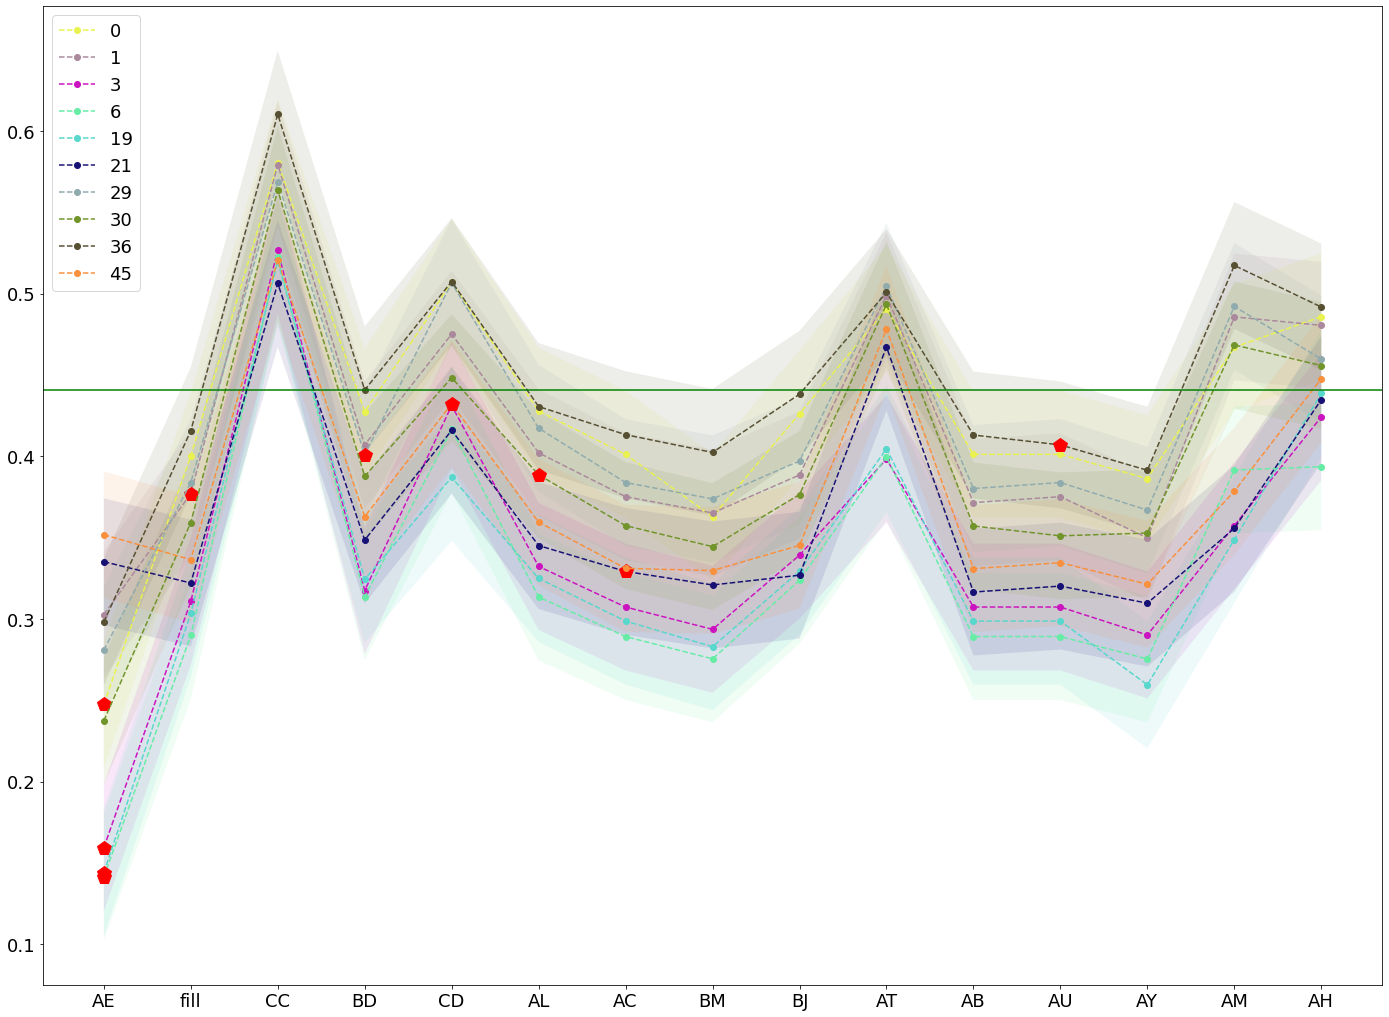

In [8]:
#########################################
################ SCHEME #################
#########################################

import random

# Choosing one case from each cluster to analyse the effect
checking_list = [0,1,3,6,19,21,29,30,36,45]
#,
# Just the label for plot x-axis
case = np.zeros((len(df1['Scheme'].unique())), np.float64)
f, ax = plt.subplots()
samples = np.arange(0,(len(df1['Scheme'].unique())))

# Generating colors for the plot of matplotlib line poots to be ploitte d
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(checking_list))]

color_count = 0
for i in checking_list:
    test = df1[i:].to_dict(orient='records')[0]
    transformed = transform_input(test)
    probab_main = best_model.predict_proba(transformed)[0][1]
    print('Present Scheme for first is {}'.format(test['Scheme']))
    count=0
    for s in df1['Scheme'].unique():
        test1 = test.copy()
        test1['Scheme'] = s
        transformed = transform_input(test1)
        predicted_probab = best_model.predict_proba(transformed)[0][1]
        #print("Scheme {} predicted {}".format(i,predicted_probab))
        case[count] = predicted_probab 
        count = count +1 
    ax.plot(samples, case, linestyle='--', marker='o', color=colors[color_count], label=str(i))
    ax.fill_between(samples, case-0.039, case+0.039 ,alpha=0.1, facecolor=colors[color_count])
    ax.plot([df1['Scheme'].unique().tolist().index(test['Scheme'])], [probab_main], 'rp', markersize=14)
    color_count = color_count+1

ax.set_xticks(samples)
ax.set_xticklabels(df1['Scheme'].unique())
ax.axhline(y=0.441, color='g', linestyle='-')

plt.legend()
plt.show()

plot_width, plot_height = (24,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plt.rcParams['font.size']=21

Present Scheme for first is Floating Support
Present Scheme for first is Accommodation
Present Scheme for first is Floating Support
Present Scheme for first is Floating Support
Present Scheme for first is Floating Support
Present Scheme for first is Accommodation
Present Scheme for first is Accommodation
Present Scheme for first is Accommodation
Present Scheme for first is Accommodation
Present Scheme for first is Accommodation


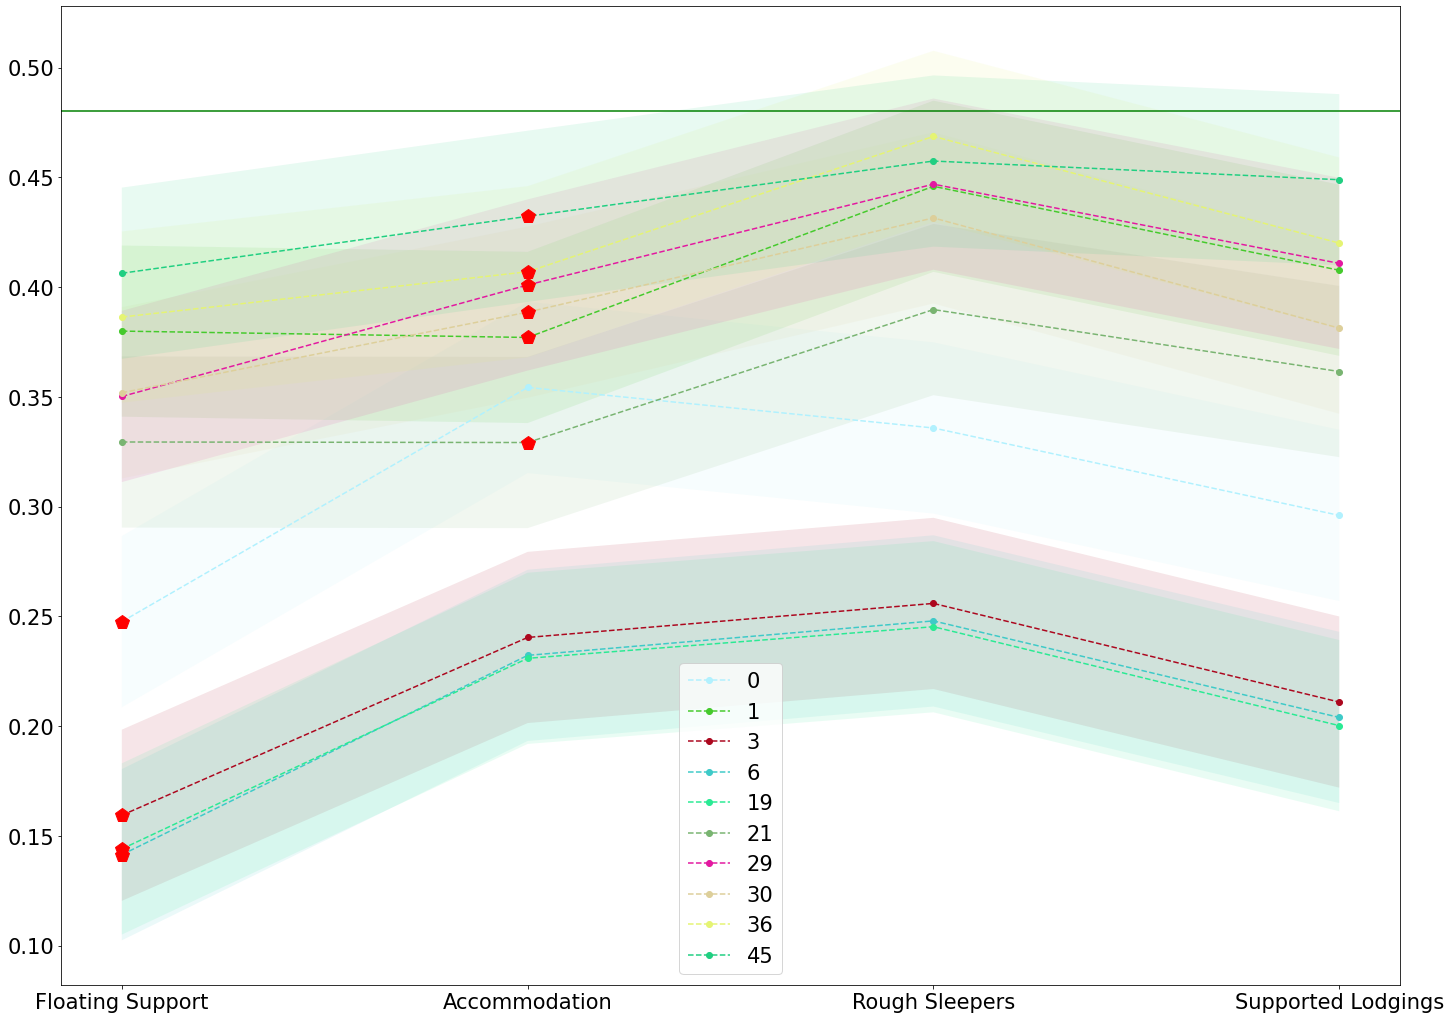

In [9]:
#########################################
############# SERVICE TYPE ##############
#########################################

import random

# Choosing one case from each cluster to analyse the effect
checking_list = [0,1,3,6,19,21,29,30,36,45]

# Just the label for plot x-axis
case = np.zeros((len(df1['Service Type'].unique())), np.float64)
f, ax = plt.subplots()
samples = np.arange(0,(len(df1['Service Type'].unique())))

# Generating colors for the plot of matplotlib line poots to be ploitte d
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(checking_list))]

color_count = 0
for i in checking_list:
    test = df1[i:].to_dict(orient='records')[0]
    transformed = transform_input(test)
    probab_main = best_model.predict_proba(transformed)[0][1]
    print('Present Scheme for first is {}'.format(test['Service Type']))
    count=0
    for s in df1['Service Type'].unique():
        test1 = test.copy()
        test1['Service Type'] = s
        transformed = transform_input(test1)
        predicted_probab = best_model.predict_proba(transformed)[0][1]
        #print("Scheme {} predicted {}".format(i,predicted_probab))
        case[count] = predicted_probab 
        count = count +1 
    ax.plot(samples, case, linestyle='--', marker='o', color=colors[color_count], label=str(i))
    ax.fill_between(samples, case-0.039, case+0.039 ,alpha=0.1, facecolor=colors[color_count])
    ax.plot([df1['Service Type'].unique().tolist().index(test['Service Type'])], [probab_main], 'rp', markersize=14)
    color_count = color_count+1

ax.set_xticks(samples)
ax.set_xticklabels(df1['Service Type'].unique())
ax.axhline(y=0.48, color='g', linestyle='-')

plt.legend()
plt.show()

plot_width, plot_height = (24,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plt.rcParams['font.size']=21

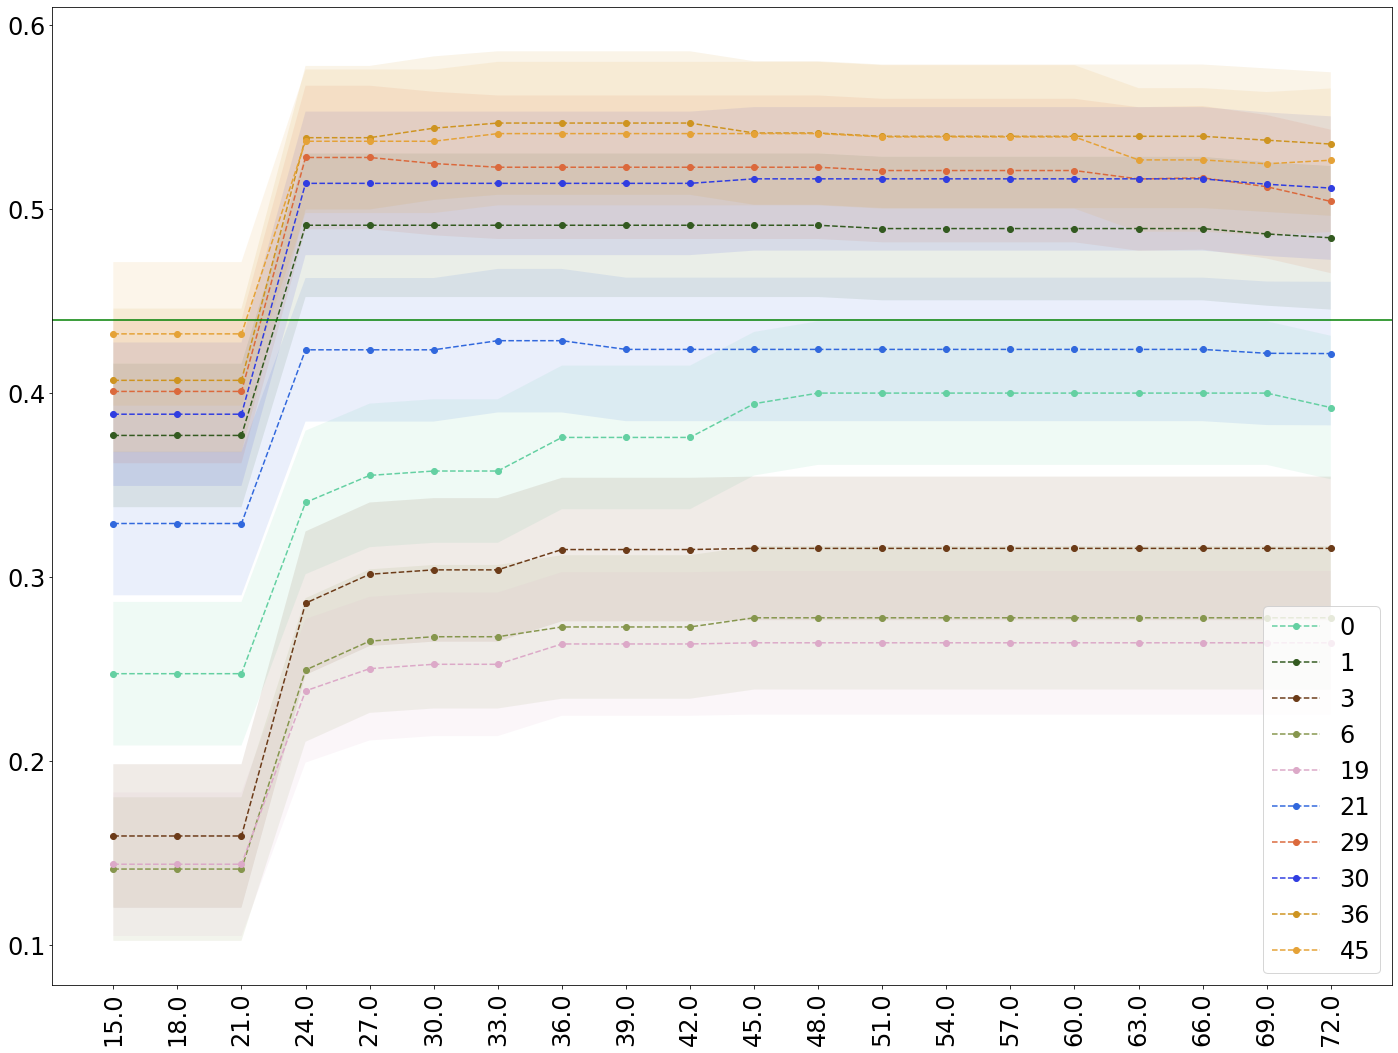

In [11]:
#########################################
############ TIME PER SESSION ###########
#########################################

import random

# Choosing one case from each cluster to analyse the effect
checking_list = [0,1,3,6,19,21,29,30,36,45]

# Just the label for plot x-axis
case = np.zeros(20, np.float64)
f, ax = plt.subplots()
samples = np.arange(0,len(case))

# Generating colors for the plot of matplotlib line poots to be ploitte d
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(checking_list))]

color_count = 0
for i in checking_list:
    test = df1[i:].to_dict(orient='records')[0]
    transformed = transform_input(test)
    probab_main = best_model.predict_proba(transformed)[0][1]
    #print('Present Scheme for first is {}'.format(test['Session per week']))
    count=0
    for s in np.arange(15.0,75,3.0):
        test1 = test.copy()
        test1['Session per week'] = s
        transformed = transform_input(test1)
        predicted_probab = best_model.predict_proba(transformed)[0][1]
        #print("Scheme {} predicted {}".format(i,predicted_probab))
        case[count] = predicted_probab 
        count = count +1 
    ax.plot(samples, case, linestyle='--', marker='o', color=colors[color_count], label=str(i))
    ax.fill_between(samples, case-0.039, case+0.039 ,alpha=0.1, facecolor=colors[color_count])
    color_count = color_count+1

ax.set_xticks(samples)
case = np.arange(15.0,75,3.0)
ax.set_xticklabels(case, rotation=90)
ax.axhline(y=0.44, color='g', linestyle='-')

plt.legend()
plt.show()

plot_width, plot_height = (24,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plt.rcParams['font.size']=24

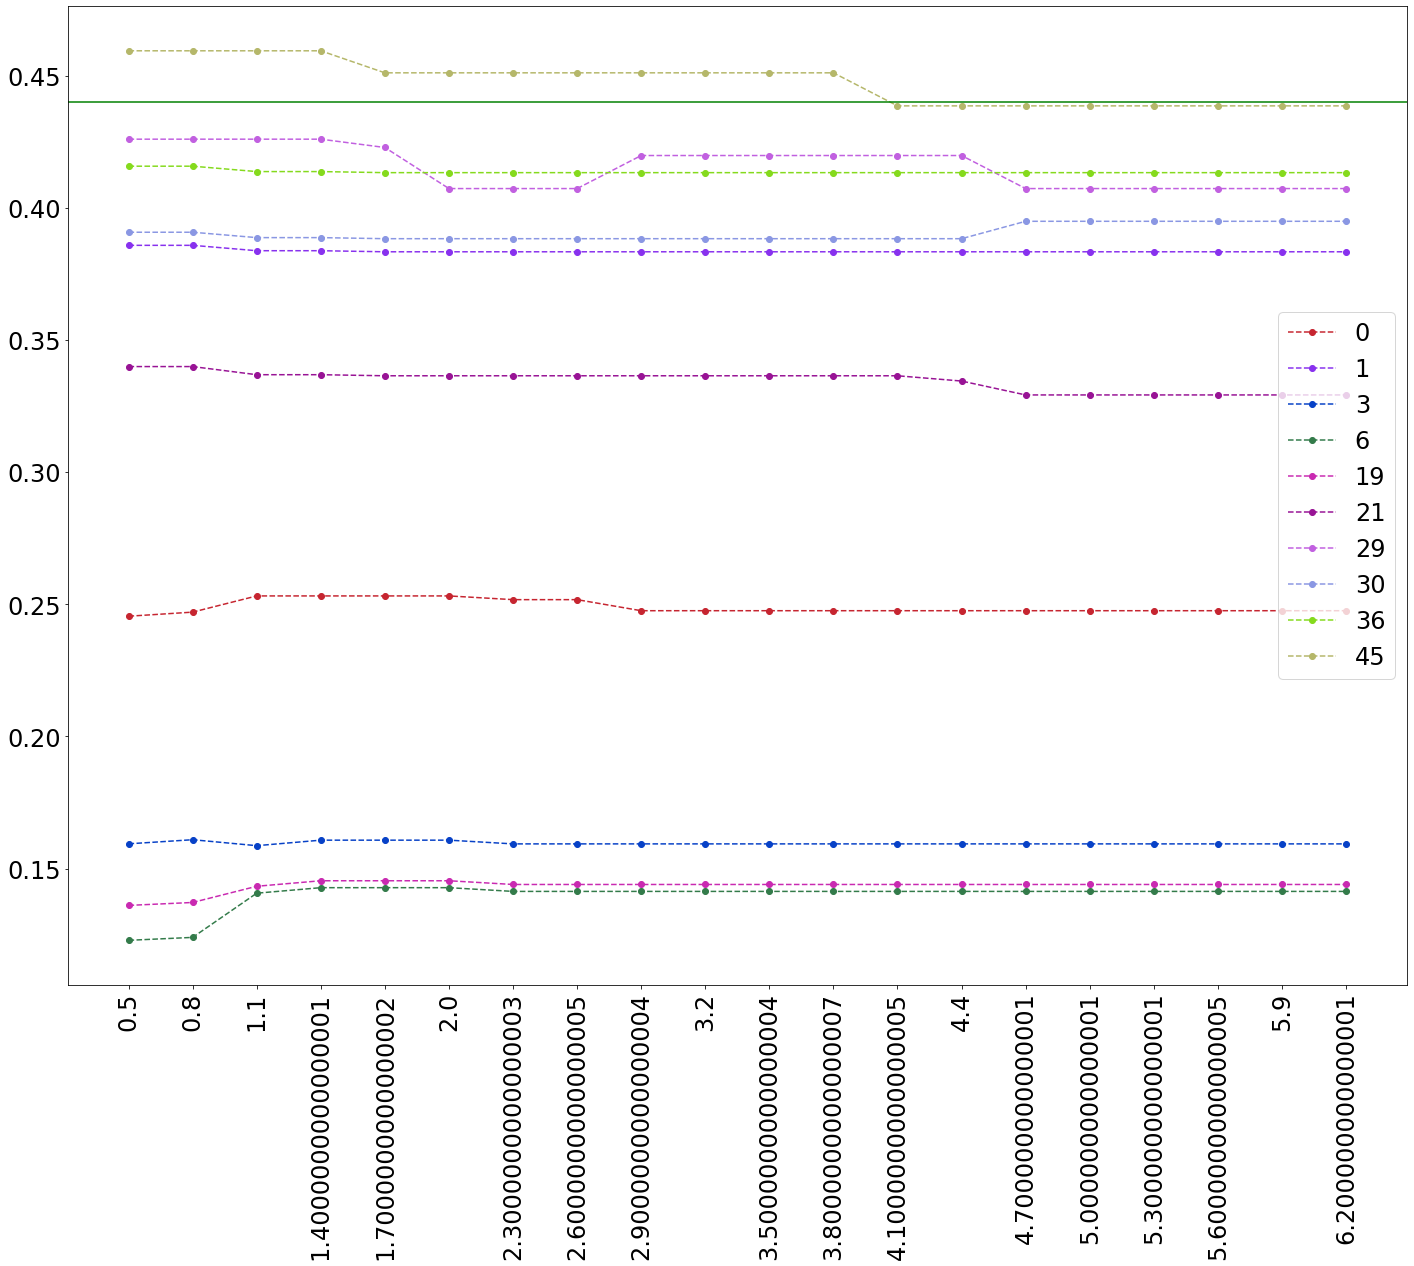

In [12]:
#########################################
############ SESSION PER WEEK ###########
#########################################

import random

# Choosing one case from each cluster to analyse the effect
checking_list = [0,1,3,6,19,21,29,30,36,45]

# Just the label for plot x-axis
case = np.zeros(20, np.float64)
f, ax = plt.subplots()
samples = np.arange(0,len(case))

# Generating colors for the plot of matplotlib line poots to be ploitte d
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(checking_list))]

color_count = 0
for i in checking_list:
    test = df1[i:].to_dict(orient='records')[0]
    transformed = transform_input(test)
    probab_main = best_model.predict_proba(transformed)[0][1]
    #print('Present Scheme for first is {}'.format(test['Session per week']))
    count=0
    for s in np.arange(0.5,6.5,0.3):
        test1 = test.copy()
        test1['Time per Session'] = s
        transformed = transform_input(test1)
        predicted_probab = best_model.predict_proba(transformed)[0][1]
        #print("Scheme {} predicted {}".format(i,predicted_probab))
        case[count] = predicted_probab 
        count = count + 1
    ax.plot(samples, case, linestyle='--', marker='o', color=colors[color_count], label=str(i))
    #ax.fill_between(samples, case-0.039, case+0.039 ,alpha=0.1, facecolor=colors[color_count])
    color_count = color_count+1

ax.set_xticks(samples)
case = np.arange(0.5,6.5,0.3)
ax.set_xticklabels(case, rotation = 90)
ax.axhline(y=0.44, color='g', linestyle='-')

plt.legend()
plt.show()

plot_width, plot_height = (24,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plt.rcParams['font.size']=21